In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
#load dataset
df = pd.read_csv('C:\\Users\\samma\\MLProject\\Datasets\\dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.shape

(6019, 13)

In [6]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
df = df.drop("New_Price",axis=1)
df = df.drop("Location",axis=1)
df.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
df["Name"].value_counts()

Mahindra XUV500 W8 2WD                                         49
Maruti Swift VDI                                               45
Maruti Swift Dzire VDI                                         34
Honda City 1.5 S MT                                            34
Maruti Swift VDI BSIV                                          31
Maruti Ritz VDi                                                30
Hyundai i10 Sportz                                             30
Toyota Fortuner 3.0 Diesel                                     29
Hyundai Grand i10 Sportz                                       27
Honda Amaze S i-Dtech                                          27
Honda Brio S MT                                                25
Maruti Ertiga VDI                                              25
Honda City 1.5 V MT                                            24
Maruti Wagon R VXI                                             23
Hyundai Verna 1.6 SX                                           23
Maruti Wag

In [9]:
manufacture = df["Name"].str.split(" ", expand = True)
df["Manufacturer"] = manufacture[0]
df = df.drop("Name", axis=1)
df["Manufacturer"].value_counts()
#df.head()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
Isuzu               3
Lamborghini         1
Bentley             1
Smart               1
Ambassador          1
Name: Manufacturer, dtype: int64

In [10]:
curr_time = datetime.datetime.now()
df["Age"] = df["Year"].apply(lambda x: curr_time.year - x)
df = df.drop("Year",axis=1)
df.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Age
0,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,13
1,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,8
2,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,12
3,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,11
4,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,10


In [11]:
str_features = ["Mileage","Engine","Power"]
for i in str_features:
    str_split = df[i].str.split(" ",expand=True)
    df[i] = pd.to_numeric(str_split[0], errors="coerce")
df.head()
df.isna().sum()

Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Manufacturer           0
Age                    0
dtype: int64

In [12]:
df["Mileage"].fillna(df["Mileage"].astype("float64").mean(), inplace = True)
df["Engine"].fillna(df["Engine"].astype("float64").mean(), inplace = True)
df["Power"].fillna(df["Power"].astype("float64").mean(), inplace = True)
df["Seats"].fillna(df["Seats"].astype("float64").mean(), inplace = True)
df.isna().sum()

Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Manufacturer         0
Age                  0
dtype: int64

In [13]:
df.columns

Index(['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Manufacturer', 'Age'],
      dtype='object')

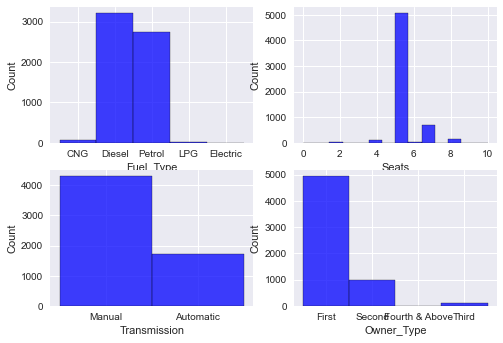

In [14]:
#plotting count-histograms for non-numeric individual features.
plt.subplot(2,2,1)
sns.histplot(df['Fuel_Type'],stat='count',color='blue')
plt.subplot(2,2,2)
sns.histplot(df['Seats'],stat='count',color='blue')
plt.subplot(2,2,3)
sns.histplot(df['Transmission'],stat='count',color='blue')
plt.subplot(2,2,4)
sns.histplot(df['Owner_Type'],stat='count',color='blue')
plt.show()

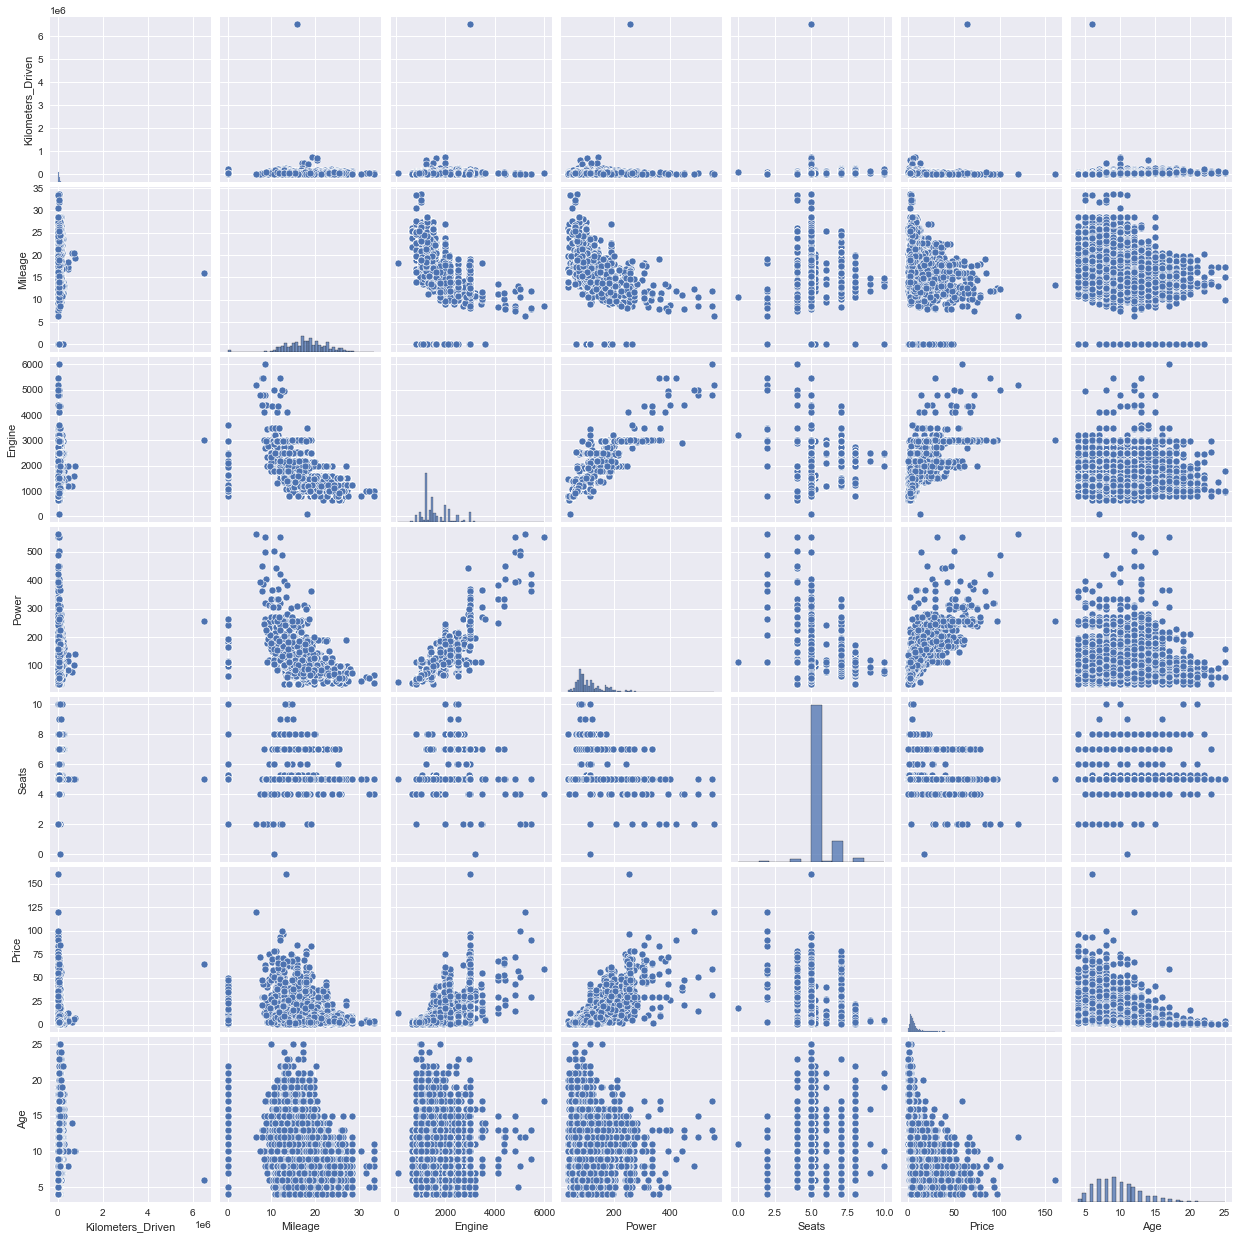

In [15]:
sns.pairplot(df)

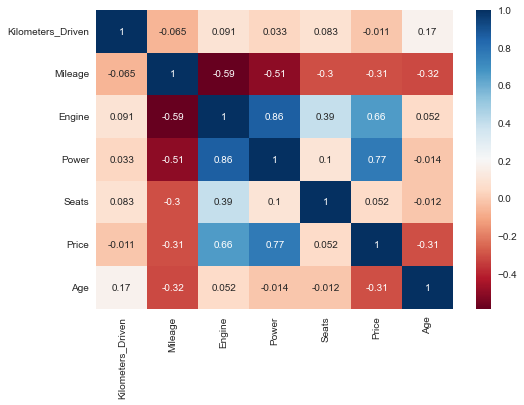

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

In [17]:
df = pd.get_dummies(data=df,drop_first = True)
df.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Force,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_Isuzu,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lamborghini,Manufacturer_Land,Manufacturer_Mahindra,Manufacturer_Maruti,Manufacturer_Mercedes-Benz,Manufacturer_Mini,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,72000,26.60,998.0,58.16,5.0,1.75,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,5.0,12.50,8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,5.0,4.50,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,7.0,6.00,11,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,5.0,17.74,10,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
#separating dependent and independent variables
y = df['Price']
x = df.drop('Price',axis=1)
y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state=1)

In [20]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(4815, 43)
(1204, 43)
(4815,)
(1204,)


In [21]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
CV = []
R2_train = []
R2_test = []

def car_pred(model):
    # Training model
    model.fit(x_tr,y_tr)
            
    # R2 score of train set
    y_pred_tr = model.predict(x_tr)
    R2_train_model = r2_score(y_tr,y_pred_tr)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_te = model.predict(x_te)
    R2_test_model = r2_score(y_te,y_pred_te)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,x_tr ,y_tr ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_tr-y_pred_tr),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_te, y = y_pred_te)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

Train R2-score : 0.76
Test R2-score : 0.73
Train CV scores : [0.78095843 0.67408452 0.76317538 0.73504226 0.75948603]
Train CV mean : 0.74


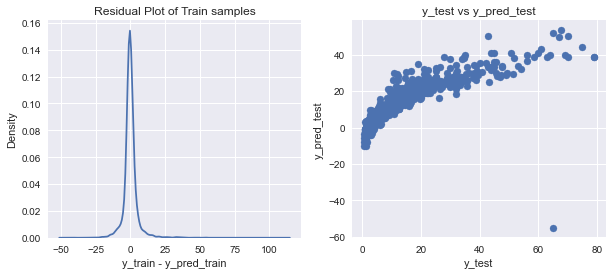

In [22]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
car_pred(slr)

Train R2-score : 0.76
Test R2-score : 0.73
Train CV scores : [0.77154236 0.67377154 0.76094806 0.73527803 0.75738801]
Train CV mean : 0.74


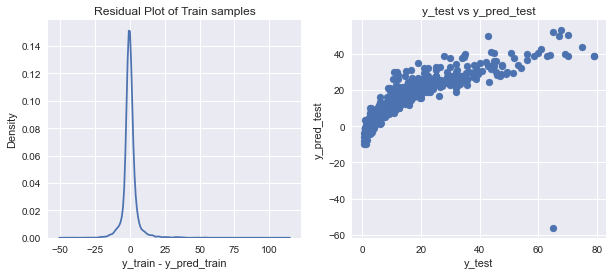

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred(ls_rs)

Train R2-score : 0.76
Test R2-score : 0.73
Train CV scores : [0.77762743 0.67406442 0.76317692 0.73504488 0.75881027]
Train CV mean : 0.74


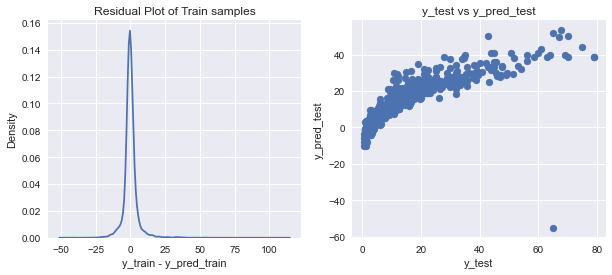

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred(rg_rs)

Train R2-score : 0.94
Test R2-score : 0.92
Train CV scores : [0.89707843 0.78988546 0.86935461 0.89285743 0.79380669]
Train CV mean : 0.85


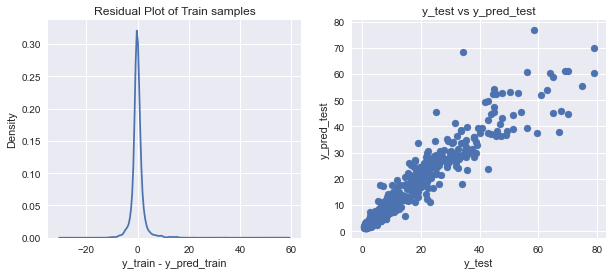

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_pred(rf_rs)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_pred(gb_rs)

In [ ]:
#Displaying results for each model applied 
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

In [ ]:
import joblib
joblib.dump(rf_rs,open('rf_newcarmodel.joblib','wb'))

joblib.dump(gb_rs, open('gb_newcarmodel.joblib','wb'))
print("dumped")